In [1]:
!pip install -r packages.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 2.0 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 27.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 70.4 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.6 MB/s eta 0:00:0000:0100:01m
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 25.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.7/174.7 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 63.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 48.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━

# Prepare Dataset

In [1]:
output_dir = 'results-30-maxlen-50'
cache_dir = "liputan6_cache"

In [2]:
train_dir = '../liputan6_aug/Liputan6_30.csv'
val_dir = '../liputan6_aug/Liputan6_canonical_dev.csv'
test_dir = '../liputan6_aug/Liputan6_canonical_test.csv'

In [5]:
import pandas as pd
train_raw_data = pd.read_csv(train_dir)
val_raw_data = pd.read_csv(val_dir)
test_raw_data = pd.read_csv(test_dir)

In [6]:
from datasets import Dataset
train_data = Dataset.from_pandas(train_raw_data)
val_data = Dataset.from_pandas(val_raw_data)
test_data = Dataset.from_pandas(test_raw_data)

In [7]:
print(train_data)

Dataset({
    features: ['Article', 'Summary'],
    num_rows: 216883
})


In [6]:
import re

def cleanse_text(data):
    text = data['Article']

    # Remove starting 'Liputan6.com'
    if text.startswith("Liputan6 . com ,"):
        text = re.sub(r"Liputan6 \. com , [A-Za-z\s]+ :", '', text).lstrip()
    # Remove space before punctuation
    text = re.sub(r'\s+([.,:;!?])', r'\1', text)
    text = re.sub(r'\( \w+\/[\w\s]+ [\w\s]+\).', '', text).rstrip()
    data['Article'] = text

    text = data['Summary']
    text = re.sub(r'\s+([.,:;!?])', r'\1', text)
    data['Summary'] = text
    return data

def truncate_text(data, max_length=1024):
    data['Article'] = data['Article'][:max_length]
    return data


In [9]:
clean_train_data = train_data.map(cleanse_text)
clean_val_data = val_data.map(cleanse_text)
clean_test_data = test_data.map(cleanse_text)

Map:   0%|          | 0/216883 [00:00<?, ? examples/s]

Map:   0%|          | 0/10972 [00:00<?, ? examples/s]

Map:   0%|          | 0/10972 [00:00<?, ? examples/s]

In [10]:
print(clean_val_data['Article'][3])

Petugas Kepolisian Resor Surabaya Timur menembak seorang residivis pencurian kendaraan bermotor yang juga berprofesi sebagai pengedar shabu-shabu, baru-baru ini. Dari tangan tersangka, polisi menyita satu unit sepeda motor dan shabu-shabu dalam kemasan beserta alat hisapnya. Kepala Polres Surabaya Timur Ajun Komisaris Besar Polisi Safarudin menyatakan, tersangka yang bernama Suroto adalah residivis kelas kakap, khususnya dalam pencurian kendaraan. Suroto yang berusia 22 tahun itu juga dikenal sebagai pengedar shabu-shabu di kawasan Bogen, Surabaya. Berdasarkan data, sudah 50 kali lebih Suroto melakukan curanmor di berbagai daerah seperti Surabaya, Mojokerto, Gresik, dan Pasuruan. Ia menambahkan, polisi berhasil membekuk Suroto saat sedang berpesta shabu-shabu bersama lima kawannya di daerah Bogen. Hingga kini, polisi masih melakukan penyelidikan guna mengetahui asal shabu-shabu tersebut.


In [11]:
print(len(clean_val_data['Article'][3]))

900


In [12]:
truncated_train_data = clean_train_data.map(truncate_text)
truncated_val_data = clean_val_data.map(truncate_text)
truncated_test_data = clean_test_data.map(truncate_text)

Map:   0%|          | 0/216883 [00:00<?, ? examples/s]

Map:   0%|          | 0/10972 [00:00<?, ? examples/s]

Map:   0%|          | 0/10972 [00:00<?, ? examples/s]

In [13]:
print(truncated_train_data['Article'][0])

Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk. Yudhoyono berharap masalah ini menjadi pembahasan penting dalam Konferensi Tingkat Tinggi Asia-Afrika. Demikian pidato Yudhoyono saat membuka KTT Asia-Afrika di Jakarta Convention Centre, Jakarta, Jumat ( 22/4 ) [ baca: Presiden Yudhoyono Resmi Membuka KAA ]. Pada awal pidatonya, Yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan Tsunami di Nanggroe Aceh Darussalam dan Nias, Sumatra Utara. Selanjutnya, Yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme, tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua. Acara pembukaan konferensi ini juga dihadiri Sekretaris Jenderal Perserikatan Bangsa-Bangsa Kofi Annan yang datang sebagai tamu kehormatan. Meski fokusnya adalah mempererat hubungan antara Asia dan Afrika, konferensi ini dipastikan akan diwarnai sejumlah pertem

In [14]:
print(len(truncated_train_data['Article'][0]))

1024


In [15]:
# @title
print(truncated_train_data)

Dataset({
    features: ['Article', 'Summary'],
    num_rows: 216883
})


# Initialize tokenizer and model

In [7]:
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer
from indobenchmark.tokenization_indonlg import IndoNLGTokenizer

tokenizer = IndoNLGTokenizer.from_pretrained("indobenchmark/indobart-v2")
model = AutoModelForSeq2SeqLM.from_pretrained("indobenchmark/indobart-v2").to("cuda")

In [3]:
def print_trainable_parameters(model):
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
    print(
        f"trainable params: {trainable_params} || all params: {all_param} || trainable%: {100 * trainable_params / all_param:.2f}"
    )

print_trainable_parameters(model)

trainable params: 131543040 || all params: 131543040 || trainable%: 100.00


In [4]:
print(model)

MBartForConditionalGeneration(
  (model): MBartModel(
    (shared): Embedding(40004, 768, padding_idx=1)
    (encoder): MBartEncoder(
      (embed_tokens): Embedding(40004, 768, padding_idx=1)
      (embed_positions): MBartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0): MBartEncoderLayer(
          (self_attn): MBartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), eps=

### Mencoba

In [19]:
# @title
sentence = truncated_train_data['Article'][0]
sentence

'Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk. Yudhoyono berharap masalah ini menjadi pembahasan penting dalam Konferensi Tingkat Tinggi Asia-Afrika. Demikian pidato Yudhoyono saat membuka KTT Asia-Afrika di Jakarta Convention Centre, Jakarta, Jumat ( 22/4 ) [ baca: Presiden Yudhoyono Resmi Membuka KAA ]. Pada awal pidatonya, Yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan Tsunami di Nanggroe Aceh Darussalam dan Nias, Sumatra Utara. Selanjutnya, Yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme, tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua. Acara pembukaan konferensi ini juga dihadiri Sekretaris Jenderal Perserikatan Bangsa-Bangsa Kofi Annan yang datang sebagai tamu kehormatan. Meski fokusnya adalah mempererat hubungan antara Asia dan Afrika, konferensi ini dipastikan akan diwarnai sejumlah perte

In [20]:
# @title
tokenized = tokenizer.prepare_input_for_generation(sentence, return_tensors='pt', lang_token = '[indonesian]', decoder_lang_token='[indonesian]', padding='max_length')
tokenized

{'input_ids': tensor([    0,  2304, 18287,  8985, 19371,  8896,   601,  5079,  3167,   295,
         8325,  2073, 39962,  2228,   615,  3364,   309,  6494,   580,   361,
          450,  1133,  8878,   295,   578,  2718, 39955, 19371,  3040,  1133,
          361,   526,  5516,  1205,   420,  9810,  1659,  1043,  3364, 39962,
         1827,  5887, 39955,  1571,  9440, 19371,   580,  2426, 33543,  3364,
        39962,  1827,  5887,   277,  1105, 27834, 14935, 39956,  1105, 39956,
         4459,   327,  2330, 39974, 39973,   329,  1315,  2194, 39969,  2304,
        19371,  2058,  2426, 25909, 10709,   427,  1657, 31756, 39956, 19371,
          662,  2061,   365,   708,  3684,   314,  6013, 10762,   568,  3014,
         6531,   309, 12937,   277, 38863,  1416, 17435,   309,  5186, 39956,
         7651,  1003, 39955,  1965, 39956, 19371,  6829,  3537,   361,  3974,
         8052,  2748,   446,  2358, 39956,   955,  2982,  1154,   365,  8712,
         1133,   295,  8325,  1265, 10828, 39955, 

In [21]:
# @title
decoded = tokenizer.decode(tokenized['input_ids'])
decoded

'<s> presiden susilo bambang yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa asia dan afrika saat ini adalah masalah kemiskinan yang sangat buruk. yudhoyono berharap masalah ini menjadi pembahasan penting dalam konferensi tingkat tinggi asia-afrika. demikian pidato yudhoyono saat membuka ktt asia-afrika di jakarta convention centre, jakarta, jumat ( 22/4 ) [ baca: presiden yudhoyono resmi membuka kaa ]. pada awal pidatonya, yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan tsunami di nanggroe aceh darussalam dan nias, sumatra utara. selanjutnya, yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme, tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua. acara pembukaan konferensi ini juga dihadiri sekretaris jenderal perserikatan bangsa-bangsa kofi annan yang datang sebagai tamu kehormatan. meski fokusnya adalah mempererat hubungan antara asia dan afrika, konferensi ini dipastikan akan diwarnai sejumlah p

In [22]:
# @title
print(type(tokenized))

<class 'transformers.tokenization_utils_base.BatchEncoding'>


In [23]:
# @title
tokenizer.is_fast

False

In [25]:
# @title
# An example sentence
sentence = truncated_train_data['Article'][0]

# Tokenize the sentence
inputs = tokenizer.prepare_input_for_generation(sentence, return_tensors='pt', lang_token = '[indonesian]', decoder_lang_token='[indonesian]', padding='max_length')

print(f"Encoded Inputs: {inputs}")

# Decode the tokens
decoded_text = tokenizer.decode(inputs['input_ids'])

print(f"Decoded Text: {decoded_text}")

Encoded Inputs: {'input_ids': tensor([    0,  2304, 18287,  8985, 19371,  8896,   601,  5079,  3167,   295,
         8325,  2073, 39962,  2228,   615,  3364,   309,  6494,   580,   361,
          450,  1133,  8878,   295,   578,  2718, 39955, 19371,  3040,  1133,
          361,   526,  5516,  1205,   420,  9810,  1659,  1043,  3364, 39962,
         1827,  5887, 39955,  1571,  9440, 19371,   580,  2426, 33543,  3364,
        39962,  1827,  5887,   277,  1105, 27834, 14935, 39956,  1105, 39956,
         4459,   327,  2330, 39974, 39973,   329,  1315,  2194, 39969,  2304,
        19371,  2058,  2426, 25909, 10709,   427,  1657, 31756, 39956, 19371,
          662,  2061,   365,   708,  3684,   314,  6013, 10762,   568,  3014,
         6531,   309, 12937,   277, 38863,  1416, 17435,   309,  5186, 39956,
         7651,  1003, 39955,  1965, 39956, 19371,  6829,  3537,   361,  3974,
         8052,  2748,   446,  2358, 39956,   955,  2982,  1154,   365,  8712,
         1133,   295,  8325,  1265

### Tokenize data

In [3]:
def tokenize_data(example):
    tokenized_inputs = tokenizer.prepare_input_for_generation(example['Article'], return_tensors='pt', lang_token = '[indonesian]', decoder_lang_token='[indonesian]', padding='max_length')
    tokenized_outputs = tokenizer.prepare_input_for_generation(example['Summary'], return_tensors='pt', lang_token = '[indonesian]', decoder_lang_token='[indonesian]', padding='max_length')

    tokenized_inputs['labels'] = tokenized_outputs['input_ids']
    return tokenized_inputs

tokenize_train_cache = "../fine-tuning/tokenize_train30_cache"
tokenize_val_cache = "../fine-tuning/tokenize_val_cache"
tokenize_test_cache = "../fine-tuning/tokenize_test_cache"


In [ ]:
tokenized_train_data = truncated_train_data.map(tokenize_data)
tokenized_val_data = truncated_val_data.map(tokenize_data)
tokenized_test_data = truncated_test_data.map(tokenize_data)
tokenized_train_data.save_to_disk(tokenize_train_cache)
tokenized_val_data.save_to_disk(tokenize_val_cache)
tokenized_test_data.save_to_disk(tokenize_test_cache)

In [4]:
from datasets import load_from_disk
tokenized_train_data = load_from_disk(tokenize_train_cache)
tokenized_val_data = load_from_disk(tokenize_val_cache)
tokenized_test_data = load_from_disk(tokenize_test_cache)

In [11]:
print(tokenized_train_data[0])

{'Article': 'Presiden Susilo Bambang Yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa Asia dan Afrika saat ini adalah masalah kemiskinan yang sangat buruk. Yudhoyono berharap masalah ini menjadi pembahasan penting dalam Konferensi Tingkat Tinggi Asia-Afrika. Demikian pidato Yudhoyono saat membuka KTT Asia-Afrika di Jakarta Convention Centre, Jakarta, Jumat ( 22/4 ) [ baca: Presiden Yudhoyono Resmi Membuka KAA ]. Pada awal pidatonya, Yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan Tsunami di Nanggroe Aceh Darussalam dan Nias, Sumatra Utara. Selanjutnya, Yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme, tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua. Acara pembukaan konferensi ini juga dihadiri Sekretaris Jenderal Perserikatan Bangsa-Bangsa Kofi Annan yang datang sebagai tamu kehormatan. Meski fokusnya adalah mempererat hubungan antara Asia dan Afrika, konferensi ini dipastikan akan diwarnai se

In [12]:
print(tokenizer.decode(tokenized_train_data[0]['input_ids']))

<s> presiden susilo bambang yudhoyono menekankan bahwa tantangan terbesar yang dihadapi bangsa-bangsa asia dan afrika saat ini adalah masalah kemiskinan yang sangat buruk. yudhoyono berharap masalah ini menjadi pembahasan penting dalam konferensi tingkat tinggi asia-afrika. demikian pidato yudhoyono saat membuka ktt asia-afrika di jakarta convention centre, jakarta, jumat ( 22/4 ) [ baca: presiden yudhoyono resmi membuka kaa ]. pada awal pidatonya, yudhoyono para peserta untuk mengheningkan cipta sejenak bagi korban gempa dan tsunami di nanggroe aceh darussalam dan nias, sumatra utara. selanjutnya, yudhoyono menegaskan pertemuan ini bukanlah sekadar romantisme, tetapi upaya bersama untuk memecahkan masalah yang dihadapi kedua benua. acara pembukaan konferensi ini juga dihadiri sekretaris jenderal perserikatan bangsa-bangsa kofi annan yang datang sebagai tamu kehormatan. meski fokusnya adalah mempererat hubungan antara asia dan afrika, konferensi ini dipastikan akan diwarnai sejumlah pe

In [13]:
print(len(tokenized_train_data['Article'][0]))

1024


# Config compute score for evaluation

In [8]:
import evaluate
import numpy as np
from nltk import sent_tokenize

metric = evaluate.load("rouge")

def compute_metrics(eval_preds):
    preds, labels = eval_preds

    # decode preds and labels
    labels = np.where(labels != -100, labels, tokenizer.pad_token_id)
    decoded_preds = [tokenizer.decode(pred, skip_special_tokens=True) for pred in preds]
    decoded_labels = [tokenizer.decode(label, skip_special_tokens=True) for label in labels]

    # result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=True) # use_stemmer = True
    result = metric.compute(predictions=decoded_preds, references=decoded_labels, use_stemmer=False) # use_stemmer = False
    return result


In [9]:
# @title
from transformers import AutoModelForSeq2SeqLM, DataCollatorForSeq2Seq, Seq2SeqTrainingArguments, Seq2SeqTrainer, SchedulerType
from transformers.trainer_callback import EarlyStoppingCallback
import torch.nn.modules.loss as nn
import torch

class LabelSmoothingLoss(nn.Module):
    def __init__(self, classes, smoothing=0.0, dim=-1):
        super(LabelSmoothingLoss, self).__init__()
        self.confidence = 1.0 - smoothing
        self.smoothing = smoothing
        self.cls = classes
        self.dim = dim

    def forward(self, pred, target):
        pred = pred.log_softmax(dim=self.dim)
        true_dist = torch.zeros_like(pred)
        true_dist.fill_(self.smoothing / (self.cls - 1))
        non_ignore_indices = target.ne(-100)  # Find non ignore indices
        target = target[non_ignore_indices].unsqueeze(1)
        true_dist = true_dist[non_ignore_indices]
        pred = pred[non_ignore_indices]  # Select same indices from pred
        true_dist.scatter_(1, target, self.confidence)
        loss = torch.mean(torch.sum(-true_dist * pred, dim=self.dim))
        return loss


class Seq2SeqTrainerWithLS(Seq2SeqTrainer):
    def compute_loss(self, model, inputs, return_outputs=False):
        labels = inputs.pop("labels")
        outputs = model(**inputs, use_cache=False)
        logits = outputs.logits
        smoothed_loss = LabelSmoothingLoss(classes=len(tokenizer), smoothing=0.1)(logits.view(-1, logits.shape[-1]), labels.view(-1))

        return (smoothed_loss, outputs) if return_outputs else smoothed_loss

# Delete Unused Rows

In [10]:
tokenized_train_data = tokenized_train_data.remove_columns(['Article', 'Summary'])

tokenized_train_data

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 216883
})

In [11]:
tokenized_val_data = tokenized_val_data.remove_columns(['Article', 'Summary'])

tokenized_val_data

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10972
})

In [12]:
tokenized_test_data = tokenized_test_data.remove_columns(['Article', 'Summary'])

tokenized_test_data

Dataset({
    features: ['input_ids', 'attention_mask', 'labels'],
    num_rows: 10972
})

# LoRa Configuration

In [23]:
import torch
import torch.nn as nn

for param in model.parameters():
  param.requires_grad = False
  if param.ndim == 1:
    param.data = param.data.to(torch.float32)

model.gradient_checkpointing_enable()
model.enable_input_require_grads()

class CastOutputtoFloat(nn.Sequential):
  def forward(self, x) : return super().forward(x).to(torch.float32)
model.lm_head = CastOutputtoFloat(model.lm_head)

In [24]:
from peft import LoraConfig, get_peft_model

config = LoraConfig(
    r=32,
    lora_alpha=32,
    target_modules=[
        "k_proj",
        "v_proj",
        "q_proj",
        "out_proj",
    ],
    lora_dropout=0.05,
    bias="none",
    task_type="Seq2Seq",
)

model = get_peft_model(model, config)
print_trainable_parameters(model)

trainable params: 3538944 || all params: 135081984 || trainable%: 2.62


# Configuration for training and generation (evaluation)

In [13]:
print_trainable_parameters(model)

NameError: name 'print_trainable_parameters' is not defined

In [14]:
data_collator = DataCollatorForSeq2Seq(tokenizer=tokenizer, model=model)

In [15]:
from transformers import GenerationConfig

generation_config = GenerationConfig(
    num_beams=5,
    max_length=50,
    min_length=15,
    length_penalty=1.5,
    no_repeat_ngram_size=3,
    bos_token_id=0
)

training_args = Seq2SeqTrainingArguments(
    # label_smoothing_factor=0.1, #label Smoothing
    output_dir=output_dir,
    evaluation_strategy="steps",
    eval_steps=10000,
    learning_rate=1e-5, #at first it's 1e-5
    warmup_ratio=0.1,
    num_train_epochs=35,
    per_device_train_batch_size=64, #ganti
    # gradient_accumulation_steps=4,
    per_device_eval_batch_size=64,
    weight_decay=0.1, # at first it's 0.01
    fp16=True,
    logging_dir='../fine-tuning/training_logs-lora',
    predict_with_generate=True,
    # generation_num_beams=5,
    load_best_model_at_end=True,  # Required for using early_stopping_callback
    save_strategy="steps",  # saves a checkpoint every "save_steps"
    generation_max_length=50,
    save_steps=10000,  # adjust as needed
    save_total_limit=2,  # limits the total amount of checkpoints and deletes the older checkpoints
    generation_config=generation_config,
    remove_unused_columns=False
)

In [16]:
from transformers import get_linear_schedule_with_warmup, AdamW
from transformers.trainer_callback import EarlyStoppingCallback

# Define the number of training steps and warmup steps
num_train_steps = len(tokenized_train_data) * training_args.num_train_epochs
num_warmup_steps = int(num_train_steps * training_args.warmup_ratio)

# Create the optimizer
optimizer = AdamW(model.parameters(), lr=training_args.learning_rate)

# Create the learning rate scheduler
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_train_steps)
# Add early stopping callback
early_stopping_callback = EarlyStoppingCallback(early_stopping_patience=5)

trainer = Seq2SeqTrainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train_data,
    eval_dataset=tokenized_val_data,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
    callbacks=[early_stopping_callback],
    optimizers=(optimizer, scheduler),
)

/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:411: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Detected kernel version 5.4.0, which is below the recommended minimum of 5.5.0; this can cause the process to hang. It is recommended to upgrade the kernel to the minimum version or higher.


# **Start Training**

In [17]:
# Specify the checkpoint path for resuming training (if any)
checkpoint_path = "/workspace/fine-tuning/results-30-maxlen-50/checkpoint-110000" # change this to your checkpoint path if needed

# "/content/drive/MyDrive/results/checkpoint-200000"
# resume_from_checkpoint=checkpoint_path
result = trainer.train(resume_from_checkpoint=checkpoint_path)

Step,Training Loss,Validation Loss


In [27]:
# # @title
# import pandas as pd
# df = pd.DataFrame({
#   'date': ['9/1/22', '9/2/22', '9/3/22'],
#   'action': ['Add', 'Update', 'Delete'],
#   'msg_ids': [[1, 2, 3], [], [2, 3]],
# })
# df.set_index('date', inplace=True)


# temp_series = df['msg_ids'].apply(pd.Series, 1).stack()
# temp_series.index = temp_series.index.droplevel(-1)
# temp_series.name = 'msg_id'
# new_df = temp_series.to_frame()
# new_df.set_index('msg_id', inplace=True)
# new_df.loc[~new_df.index.duplicated(), :] # Drop duplicates.

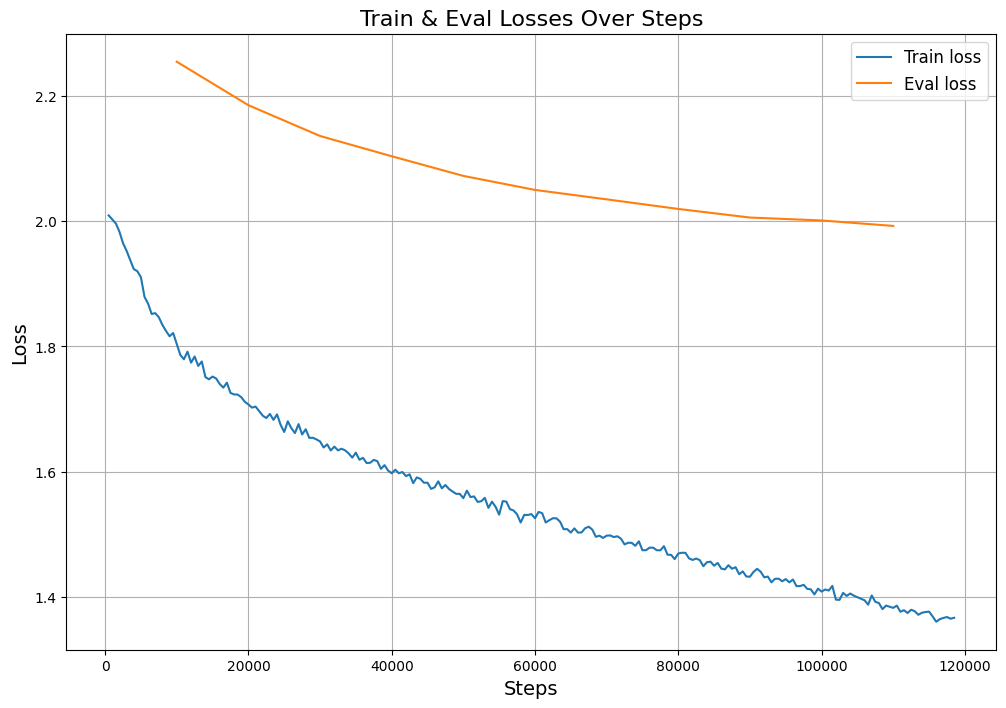

In [18]:
import matplotlib.pyplot as plt
# Extract train and eval losses from the log history
train_losses = [log['loss'] for log in trainer.state.log_history if 'loss' in log]
train_steps = [log['step'] for log in trainer.state.log_history if 'loss' in log]

eval_losses = [log['eval_loss'] for log in trainer.state.log_history if 'eval_loss' in log]
eval_steps = [log['step'] for log in trainer.state.log_history if 'eval_loss' in log]

# Plotting the train and eval losses
plt.figure(figsize=(12, 8))
plt.plot(train_steps, train_losses, label='Train loss')
plt.plot(eval_steps, eval_losses, label='Eval loss')
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Train & Eval Losses Over Steps', fontsize=16)
plt.legend(fontsize=12)
plt.grid()
plt.show()


### Testing canonical

In [19]:
# Evaluation on the test set
test_result = trainer.evaluate(tokenized_test_data)

In [20]:
print(test_result)

{'eval_loss': 1.772611141204834, 'eval_rouge1': 0.3800970427332877, 'eval_rouge2': 0.20630433207017843, 'eval_rougeL': 0.30931203759181614, 'eval_rougeLsum': 0.3094534960310831, 'eval_runtime': 808.2659, 'eval_samples_per_second': 13.575, 'eval_steps_per_second': 0.213, 'epoch': 35.0}


In [21]:

# Print the ROUGE scores
print("ROUGE-1: ", test_result["eval_rouge1"])
print("ROUGE-2: ", test_result["eval_rouge2"])
print("ROUGE-L: ", test_result["eval_rougeL"])
print("ROUGE-Lsum: ", test_result["eval_rougeLsum"])

ROUGE-1:  0.3800970427332877
ROUGE-2:  0.20630433207017843
ROUGE-L:  0.30931203759181614
ROUGE-Lsum:  0.3094534960310831


### Testing xtreme

In [22]:
import pandas as pd
from datasets import Dataset
test_xtreme_dir = '../liputan6_aug/Liputan6_xtreme_test.csv'
test_raw_xtreme_data = pd.read_csv(test_xtreme_dir)
test_xtreme_data = Dataset.from_pandas(test_raw_xtreme_data)
clean_test_xtreme_data = test_xtreme_data.map(cleanse_text)
truncated_test_xtreme_data = clean_test_xtreme_data.map(truncate_text)

Map:   0%|          | 0/3862 [00:00<?, ? examples/s]

Map:   0%|          | 0/3862 [00:00<?, ? examples/s]

In [23]:
tokenized_test_extreme_data = truncated_test_xtreme_data.map(tokenize_data)

Map:   0%|          | 0/3862 [00:00<?, ? examples/s]

In [24]:
tokenized_test_extreme_data = tokenized_test_extreme_data.remove_columns(['Article', 'Summary'])

In [25]:
test_extreme_result = trainer.evaluate(tokenized_test_extreme_data)

In [26]:
print(test_extreme_result)

{'eval_loss': 2.239394426345825, 'eval_rouge1': 0.32332547603867234, 'eval_rouge2': 0.13112583370811376, 'eval_rougeL': 0.24455500759540139, 'eval_rougeLsum': 0.24450609115263244, 'eval_runtime': 283.919, 'eval_samples_per_second': 13.602, 'eval_steps_per_second': 0.215, 'epoch': 35.0}


In [27]:
print("ROUGE-1: ", test_extreme_result["eval_rouge1"])
print("ROUGE-2: ", test_extreme_result["eval_rouge2"])
print("ROUGE-L: ", test_extreme_result["eval_rougeL"])
print("ROUGE-Lsum: ", test_extreme_result["eval_rougeLsum"])

ROUGE-1:  0.32332547603867234
ROUGE-2:  0.13112583370811376
ROUGE-L:  0.24455500759540139
ROUGE-Lsum:  0.24450609115263244


### Generate Summary

In [48]:
tokenizer = IndoNLGTokenizer.from_pretrained('indobenchmark/indobart-v2')
finetuned_model = AutoModelForSeq2SeqLM.from_pretrained('/workspace/fine-tuning/results-30/checkpoint-160000/').to("cuda")

In [49]:
print(finetuned_model)

MBartForConditionalGeneration(
  (model): MBartModel(
    (shared): Embedding(40004, 768, padding_idx=1)
    (encoder): MBartEncoder(
      (embed_tokens): Embedding(40004, 768, padding_idx=1)
      (embed_positions): MBartLearnedPositionalEmbedding(1026, 768)
      (layers): ModuleList(
        (0): MBartEncoderLayer(
          (self_attn): MBartAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (self_attn_layer_norm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (activation_fn): GELUActivation()
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (fc2): Linear(in_features=3072, out_features=768, bias=True)
          (final_layer_norm): LayerNorm((768,), eps=

In [50]:
def generate_summary(text):
    # Tokenize the input text
    inputs = tokenizer.prepare_input_for_generation(text, return_tensors='pt', lang_token = '[indonesian]', decoder_lang_token='[indonesian]')
    inputs['input_ids'] = inputs['input_ids'].unsqueeze(0)

    # Generate the output (Here, we use beam search for a more deterministic output)
    # Set the options for generation, like max_length and num_beams
    summary_ids = finetuned_model.generate(inputs['input_ids'].to('cuda'),
                                 max_length=64,
                                 num_beams=3,
                                 early_stopping=True,
                                 no_repeat_ngram_size=3,
                                 length_penalty=1.5)

    # Decode the output and return the summary
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)

    return summary



In [51]:
# @title
import random

# Get 100 random indices
random_indices = random.sample(range(len(clean_test_data)), 100)

# Get 100 random samples from the dataset
random_samples = clean_test_data.select(random_indices)
print(random_samples)

Dataset({
    features: ['Article', 'Summary'],
    num_rows: 100
})


In [52]:
import pandas as pd

df = pd.DataFrame(random_samples)
df.to_csv("../fine-tuning/test_sample_aug30_160000.csv",index=False)

In [53]:
import pandas as pd

df = pd.read_csv("test_sample_aug30_160000.csv")
df['Article'] = df['Article'].map(lambda data: data[:1024])

In [54]:
import pandas as pd
from tqdm import tqdm

summaries = []
ref_summaries = []
texts = []


for idx in tqdm(range(len(df['Article']))):
    text = df['Article'][idx]  # adjust this if your key in the dictionary is different
    reference_summary = df['Summary'][idx]  # adjust this if your key in the dictionary is different
    generated_summary = generate_summary(text)


    # append the scores and the summaries to the list
    summaries.append(generated_summary)
    texts.append(text)
    ref_summaries.append(reference_summary)

# Create a DataFrame from the summaries and texts
df = pd.DataFrame({'text': texts, 'summary': summaries, 'ref_sum': ref_summaries})

# Write the DataFrame to an Excel file
df.to_csv('sample_indobart_summaries_aug30_64_160000.csv', index=False)

100%|██████████| 100/100 [00:30<00:00,  3.25it/s]
